In [1]:
import pandas as pd

In [17]:
df = pd.read_excel("current1.xlsx", header=None)

In [15]:
df 

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,Time,Year,2014.000,2014.500,2015.000,2015.500,2016.000,2016.500,2017.000,2017.500,...,2035.500,2036.000,2036.500,2037.000,2037.500,2038.000,2038.500,2039.000,2039.500,2040.000
1,Agri wage,household,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
2,Agri wage migrates,household/Year,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Antibiotic costs[Without disease],vnd,1000000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antibiotic costs[With disease],vnd,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,World market price[Maize],vnd/kg,6900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,World market price shrimp,vnd/kg,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,...,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000,385542.000
307,Yield loss ratio[Rice],dml,0.000,0.000,0.000,0.120,0.240,0.120,0.000,0.000,...,0.120,0.000,0.000,0.000,0.120,0.240,0.120,0.000,0.000,0.000
308,Yield loss ratio[Coconut],dml,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.set_index(0).transpose()

# df = df.reset_index()
df

,Time,Agri wage,Agri wage migrates,Antibiotic costs[Without disease],Antibiotic costs[With disease],Available number of wage workers,average shrimp farm savings[Small],average shrimp farm savings[Medium],average shrimp farm savings[Large],Average wage worker income,...,Wage workers in Shrimp family[Large],Work days per wage worker,Working force within a household,World market price[Rice],World market price[Coconut],World market price[Maize],World market price shrimp,Yield loss ratio[Rice],Yield loss ratio[Coconut],Yield loss ratio[Maize]
1,Year,household,household/Year,vnd,vnd,people,NaN,NaN,NaN,vnd/people,...,person/household,days,people/household,vnd/kg,vnd/kg,vnd/kg,vnd/kg,dml,dml,dml
2,2014.0,30.0,0.0,1000000.0,0.0,1137.5,147600000.500679,147600000.500679,35200000.107288,24432000.017166,...,1.0,120.0,3.0,6049.0,17500.0,6900.0,385542.0,0.0,0.0,0.156
3,2014.5,30.0,0.0,NaN,NaN,1138.310144,253804094.154251,603587038.774912,228970360.593138,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
4,2015.0,30.0,0.0,NaN,NaN,1139.047409,373306699.817889,1072157780.843563,429689136.237303,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
5,2015.5,30.0,0.0,NaN,NaN,1139.730534,506001948.165035,1549484790.321386,637329116.249374,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.12,NaN,0.276
6,2016.0,30.0,0.0,NaN,NaN,1140.723135,652550201.735569,2050074177.694527,872018391.699542,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.24,NaN,0.396
7,2016.5,30.0,0.0,NaN,NaN,1142.259659,813200615.327523,2651251258.387683,1126063517.820338,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.12,NaN,0.276
8,2017.0,30.0,0.0,NaN,NaN,1139.484639,986211963.466678,3207174710.290749,1393844527.568208,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
9,2017.5,30.0,0.0,NaN,NaN,1126.446483,1170988774.913182,3748585501.620418,1643737302.005541,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
10,2018.0,30.0,0.0,NaN,NaN,1112.448334,1368031405.100474,4286594847.273836,1900406518.691981,24432000.017166,...,NaN,120.0,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156


In [20]:
for column in df.columns:
    print(column)

Time
Agri wage
Agri wage migrates
Antibiotic costs[Without disease]
Antibiotic costs[With disease]
Available number of wage workers
average shrimp farm savings[Small]
average shrimp farm savings[Medium]
average shrimp farm savings[Large]
Average wage worker income
Base income for non agri households[Low skilled]
Base income for non agri households[High skilled]
Base income for service workers
Chance farmer changes crops[Rice,Small]
Chance farmer changes crops[Rice,Medium]
Chance farmer changes crops[Rice,Large]
Chance farmer changes crops[Coconut,Small]
Chance farmer changes crops[Coconut,Medium]
Chance farmer changes crops[Coconut,Large]
Chance farmer changes crops[Maize,Small]
Chance farmer changes crops[Maize,Medium]
Chance farmer changes crops[Maize,Large]
Chance farmer stops farming[Rice,Small]
Chance farmer stops farming[Rice,Medium]
Chance farmer stops farming[Rice,Large]
Chance farmer stops farming[Coconut,Small]
Chance farmer stops farming[Coconut,Medium]
Chance farmer stops f

In [21]:
df = df.fillna(0)


C:\Users\sjuul\AppData\Local\Temp\ipykernel_30568\2694256034.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


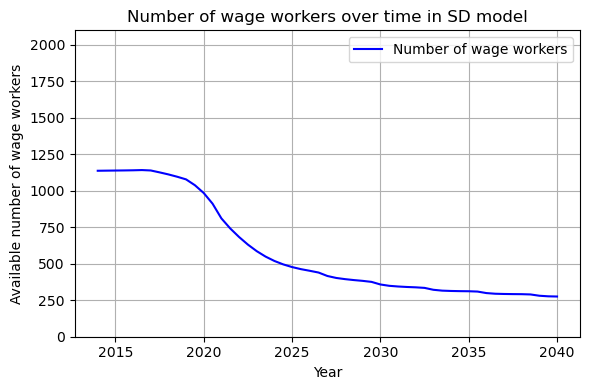

In [29]:
import matplotlib.pyplot as plt

# Zorg dat de 'Time' en 'Available number of wage workers' kolommen numeriek zijn
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Available number of wage workers'] = pd.to_numeric(df['Available number of wage workers'], errors='coerce')

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Available number of wage workers'], label='Number of wage workers', color='blue')
plt.xlabel('Year')
plt.ylabel('Available number of wage workers')
plt.title('Number of wage workers over time in SD model')
plt.grid(True)
plt.legend()
plt.ylim(0, 2100)  # Draai de y-as om van 2100 naar 0
plt.tight_layout()
plt.show()


In [32]:
df.head()

,Time,Agri wage,Agri wage migrates,Antibiotic costs[Without disease],Antibiotic costs[With disease],Available number of wage workers,average shrimp farm savings[Small],average shrimp farm savings[Medium],average shrimp farm savings[Large],Average wage worker income,...,Wage workers in Shrimp family[Large],Work days per wage worker,Working force within a household,World market price[Rice],World market price[Coconut],World market price[Maize],World market price shrimp,Yield loss ratio[Rice],Yield loss ratio[Coconut],Yield loss ratio[Maize]
1,NaN,household,household/Year,vnd,vnd,NaN,0.000000e+00,0.000000e+00,0.000000e+00,vnd/people,...,person/household,days,people/household,vnd/kg,vnd/kg,vnd/kg,vnd/kg,dml,dml,dml
2,2014.0,30.0,0.0,1000000.0,0.0,1137.500000,1.476000e+08,1.476000e+08,3.520000e+07,24432000.017166,...,1.0,120.0,3.0,6049.0,17500.0,6900.0,385542.0,0.0,0.0,0.156
3,2014.5,30.0,0.0,0,0,1138.310144,2.538041e+08,6.035870e+08,2.289704e+08,24432000.017166,...,0,120.0,0,0,0,0,385542.0,0.0,0,0.156
4,2015.0,30.0,0.0,0,0,1139.047409,3.733067e+08,1.072158e+09,4.296891e+08,24432000.017166,...,0,120.0,0,0,0,0,385542.0,0.0,0,0.156
5,2015.5,30.0,0.0,0,0,1139.730534,5.060019e+08,1.549485e+09,6.373291e+08,24432000.017166,...,0,120.0,0,0,0,0,385542.0,0.12,0,0.276


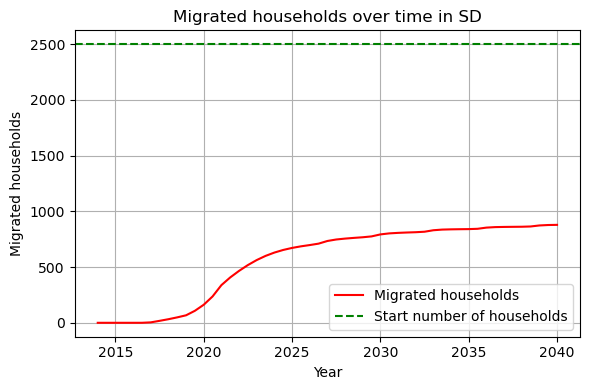

In [38]:
# Zorg dat de kolommen numeriek zijn en NaN's vervangen door 0
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Migrated households'] = pd.to_numeric(df['Migrated households'], errors='coerce').fillna(0)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Migrated households'], label='Migrated households', color='red')
plt.axhline(y=2500, color='green', linestyle='--', label='Start number of households')
plt.xlabel('Year')
plt.ylabel('Migrated households')
plt.title('Migrated households over time in SD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


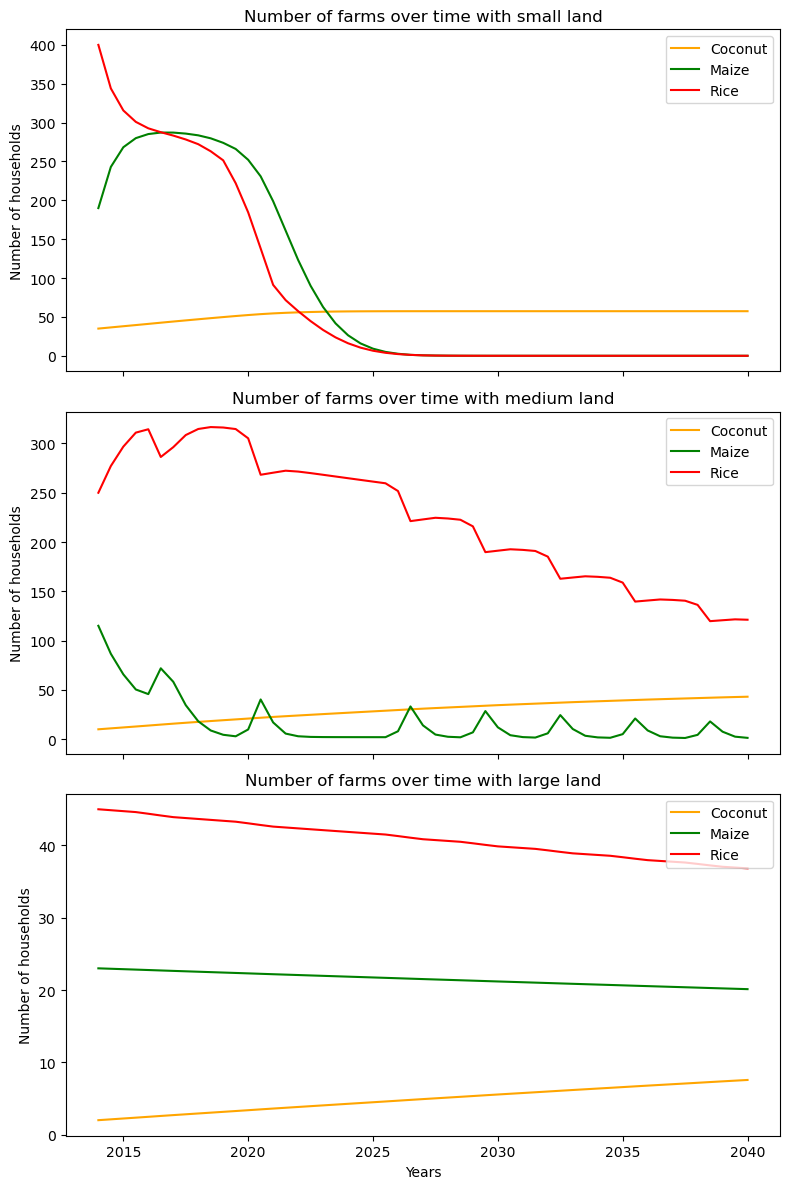

In [ ]:
import matplotlib.pyplot as plt

# Stel je dataframe heet df en bevat de benodigde kolommen.
# Zorg dat de tijd in een variabele staat, bijvoorbeeld df['Time'] of de index.

# Maak een figuur met 3 subplots onder elkaar
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
df['Coconut farm[Small]'] = pd.to_numeric(df['Coconut farm[Small]'], errors='coerce').fillna(0)
df['Maize farm[Small]'] = pd.to_numeric(df['Maize farm[Small]'], errors='coerce').fillna(0)
df['Rice farm[Small]'] = pd.to_numeric(df['Rice farm[Small]'], errors='coerce').fillna(0)
df['Coconut farm[Medium]'] = pd.to_numeric(df['Coconut farm[Medium]'], errors='coerce').fillna(0)
df['Maize farm[Medium]'] = pd.to_numeric(df['Maize farm[Medium]'], errors='coerce').fillna(0)
df['Rice farm[Medium]'] = pd.to_numeric(df['Rice farm[Medium]'], errors='coerce').fillna(0)
df['Coconut farm[Large]'] = pd.to_numeric(df['Coconut farm[Large]'], errors='coerce').fillna(0)
df['Maize farm[Large]'] = pd.to_numeric(df['Maize farm[Large]'], errors='coerce').fillna(0)
df['Rice farm[Large]'] = pd.to_numeric(df['Rice farm[Large]'], errors='coerce').fillna(0)

# Kleine landpercelen
axs[0].plot(df['Time'], df['Coconut farm[Small]'], label='Coconut', color='orange')
axs[0].plot(df['Time'], df['Maize farm[Small]'], label='Maize', color='green')
axs[0].plot(df['Time'], df['Rice farm[Small]'], label='Rice', color='red')
axs[0].set_title('Number of farms over time with small land')
axs[0].set_ylabel('Number of households')
axs[0].legend()

# Middelgrote landpercelen
axs[1].plot(df['Time'], df['Coconut farm[Medium]'], label='Coconut', color='orange')
axs[1].plot(df['Time'], df['Maize farm[Medium]'], label='Maize', color='green')
axs[1].plot(df['Time'], df['Rice farm[Medium]'], label='Rice', color='red')
axs[1].set_title('Number of farms over time with medium land')
axs[1].set_ylabel('Number of households')
axs[1].legend()

# Grote landpercelen
axs[2].plot(df['Time'], df['Coconut farm[Large]'], label='Coconut', color='orange')
axs[2].plot(df['Time'], df['Maize farm[Large]'], label='Maize', color='green')
axs[2].plot(df['Time'], df['Rice farm[Large]'], label='Rice', color='red')
axs[2].set_title('Number of farms over time with large land')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Number of households')
axs[2].legend()

plt.tight_layout()
plt.show()

Shrimp farm[Small,Without disease]
Shrimp farm[Small,With disease]
Shrimp farm[Medium,Without disease]
Shrimp farm[Medium,With disease]
Shrimp farm[Large,Without disease]
Shrimp farm[Large,With disease]

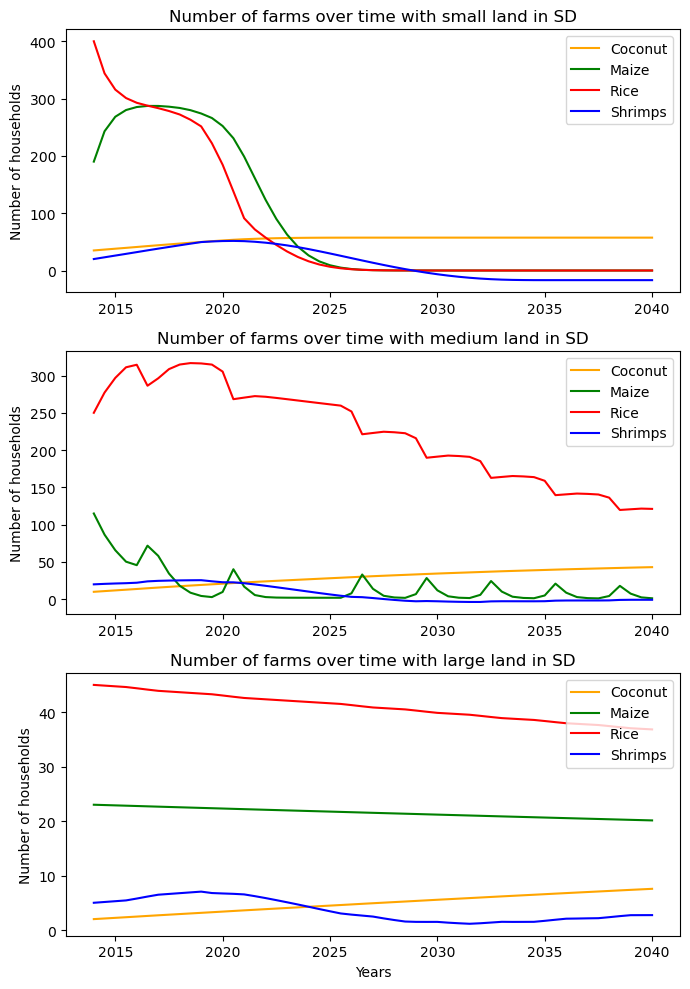

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(7,10))
df['Coconut farm[Small]'] = pd.to_numeric(df['Coconut farm[Small]'], errors='coerce').fillna(0)
df['Maize farm[Small]'] = pd.to_numeric(df['Maize farm[Small]'], errors='coerce').fillna(0)
df['Rice farm[Small]'] = pd.to_numeric(df['Rice farm[Small]'], errors='coerce').fillna(0)
df['Coconut farm[Medium]'] = pd.to_numeric(df['Coconut farm[Medium]'], errors='coerce').fillna(0)
df['Maize farm[Medium]'] = pd.to_numeric(df['Maize farm[Medium]'], errors='coerce').fillna(0)
df['Rice farm[Medium]'] = pd.to_numeric(df['Rice farm[Medium]'], errors='coerce').fillna(0)
df['Coconut farm[Large]'] = pd.to_numeric(df['Coconut farm[Large]'], errors='coerce').fillna(0)
df['Maize farm[Large]'] = pd.to_numeric(df['Maize farm[Large]'], errors='coerce').fillna(0)
df['Rice farm[Large]'] = pd.to_numeric(df['Rice farm[Large]'], errors='coerce').fillna(0)
df['Shrimps[Small]'] = pd.to_numeric(df['Shrimp farm[Small,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Small,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Medium]'] = pd.to_numeric(df['Shrimp farm[Medium,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Medium,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Large]'] = pd.to_numeric(df['Shrimp farm[Large,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Large,With disease]'], errors='coerce').fillna(0)

# Kleine landpercelen
axs[0].plot(df['Time'], df['Coconut farm[Small]'], label='Coconut', color='orange')
axs[0].plot(df['Time'], df['Maize farm[Small]'], label='Maize', color='green')
axs[0].plot(df['Time'], df['Rice farm[Small]'], label='Rice', color='red')
axs[0].plot(df['Time'], df['Shrimps[Small]'], label='Shrimps', color='blue')
axs[0].set_title('Number of farms over time with small land in SD')
axs[0].set_ylabel('Number of households')
axs[0].legend()

# Middelgrote landpercelen
axs[1].plot(df['Time'], df['Coconut farm[Medium]'], label='Coconut', color='orange')
axs[1].plot(df['Time'], df['Maize farm[Medium]'], label='Maize', color='green')
axs[1].plot(df['Time'], df['Rice farm[Medium]'], label='Rice', color='red')
axs[1].plot(df['Time'], df['Shrimps[Medium]'], label='Shrimps', color='blue')
axs[1].set_title('Number of farms over time with medium land in SD')
axs[1].set_ylabel('Number of households')
axs[1].legend()

# Grote landpercelen
axs[2].plot(df['Time'], df['Coconut farm[Large]'], label='Coconut', color='orange')
axs[2].plot(df['Time'], df['Maize farm[Large]'], label='Maize', color='green')
axs[2].plot(df['Time'], df['Rice farm[Large]'], label='Rice', color='red')
axs[2].plot(df['Time'], df['Shrimps[Large]'], label='Shrimps', color='blue')
axs[2].set_title('Number of farms over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Number of households')
axs[2].legend()

plt.tight_layout()
plt.show()
